In [36]:
# pip install finance-datareader

In [37]:
from preamble import *

In [38]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, NMF

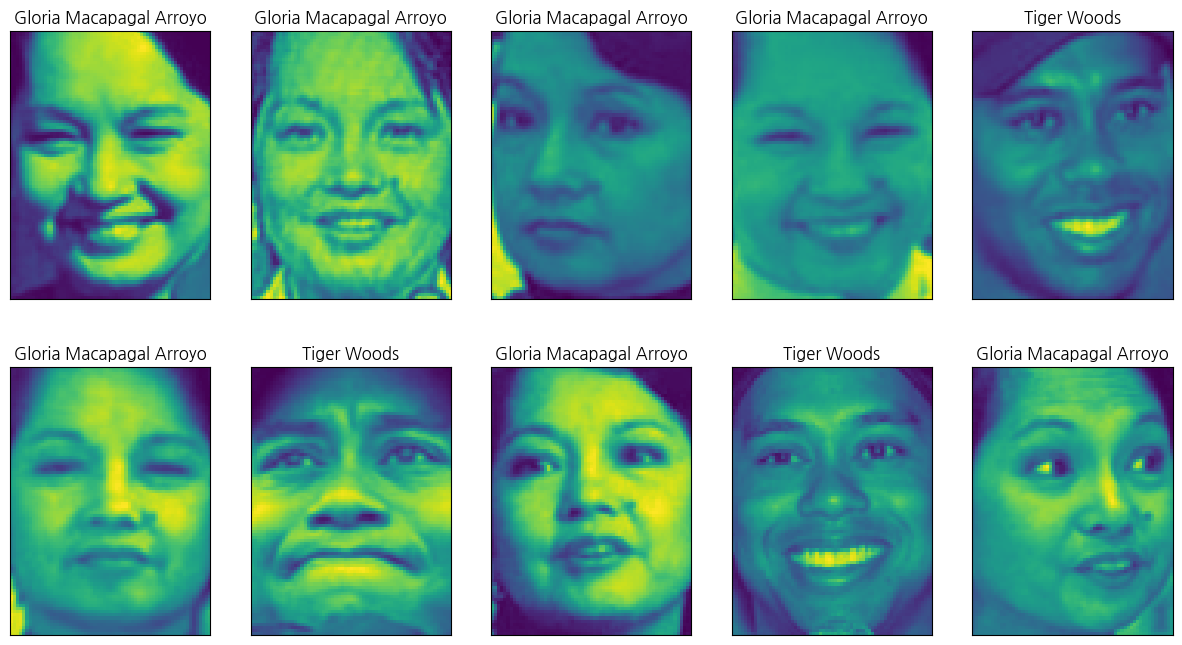

In [39]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [40]:
# np.bool은 1.20버전부터 deprecated됩니다. 대신 bool을 사용하세요.
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.0

## `k`-평균 군집

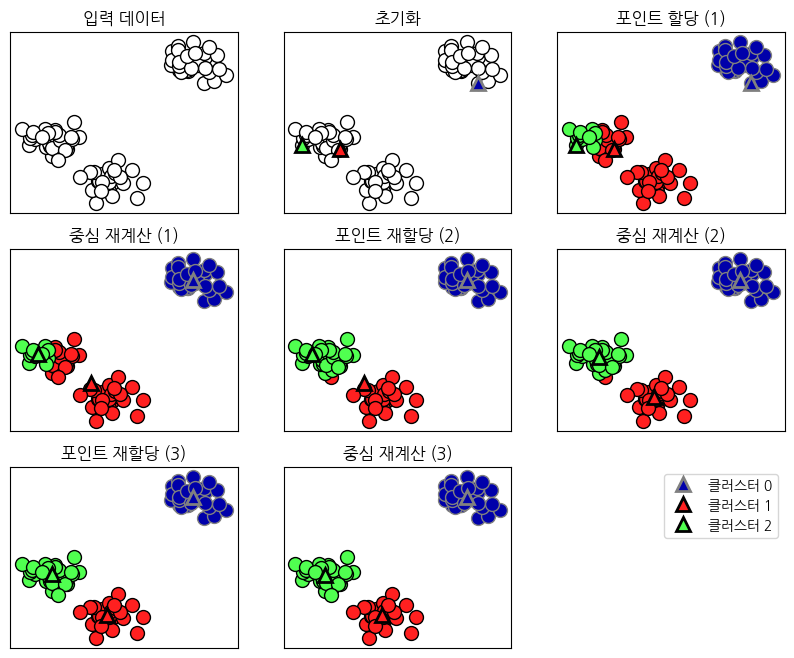

In [41]:
mglearn.plots.plot_kmeans_algorithm()

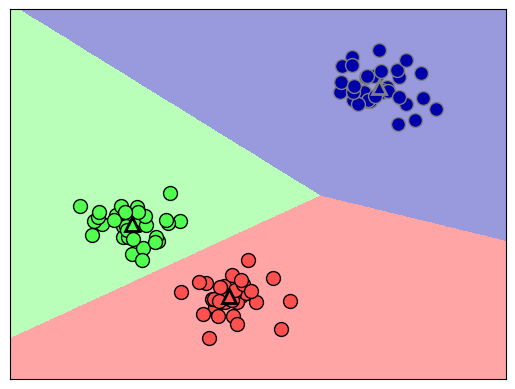

In [42]:
mglearn.plots.plot_kmeans_boundaries()

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [44]:
print(kmeans.labels_)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [45]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


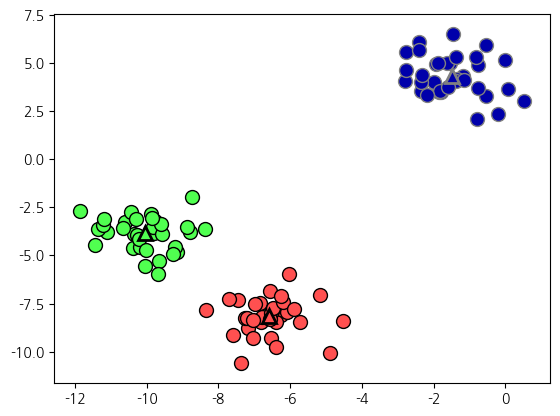

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    [0, 1, 2],
    markers="^",
    markeredgewidth=2,
)
plt.show()  # 책에는 없음

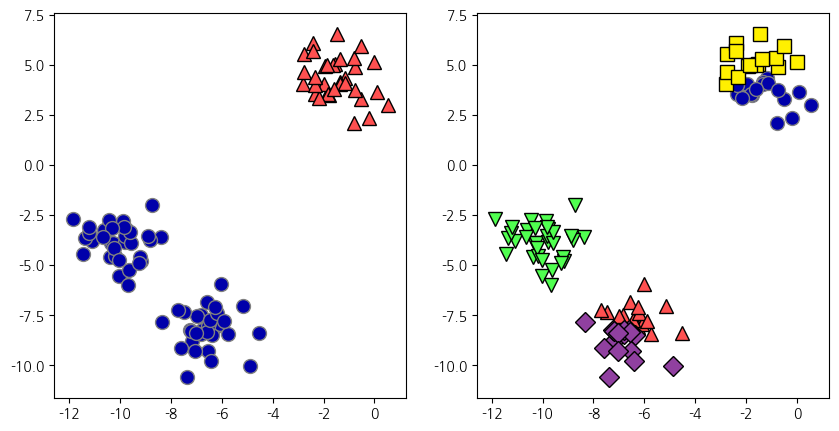

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()  # 책에는 없음

#### k-평균 알고리즘이 실패하는 경우

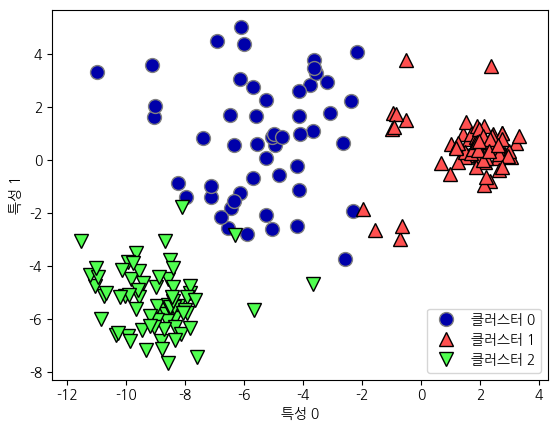

In [48]:
X_varied, y_varied = make_blobs(
    n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170
)


y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)


mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)


plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")


plt.xlabel("특성 0")


plt.ylabel("특성 1")


plt.show()  # 책에는 없음

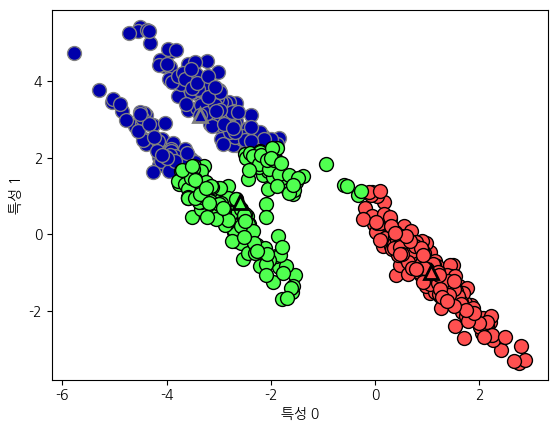

In [49]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    [0, 1, 2],
    markers="^",
    markeredgewidth=2,
)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()  # 책에는 없음

Text(0, 0.5, '특성 1')

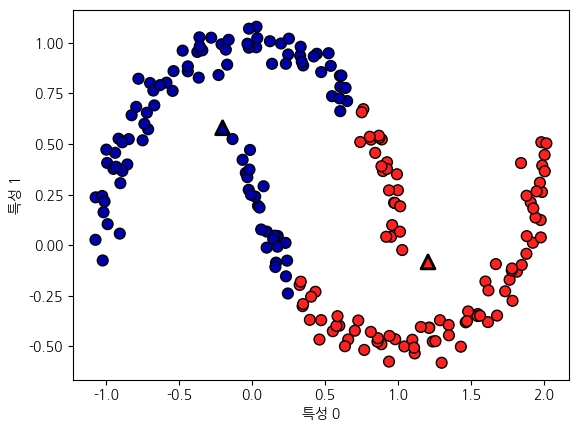

In [50]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors="k")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="^",
    c=[mglearn.cm2(0), mglearn.cm2(1)],
    s=100,
    linewidth=2,
    edgecolors="k",
)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 벡터 양자화 또는 분해 메소드로서의 k-평균

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42
)
nmf = NMF(n_components=30, init="nndsvd", max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=30, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

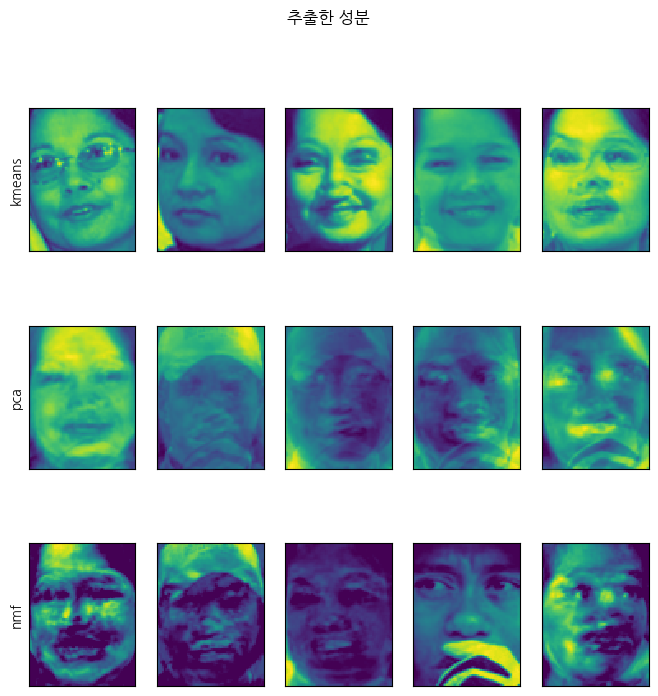

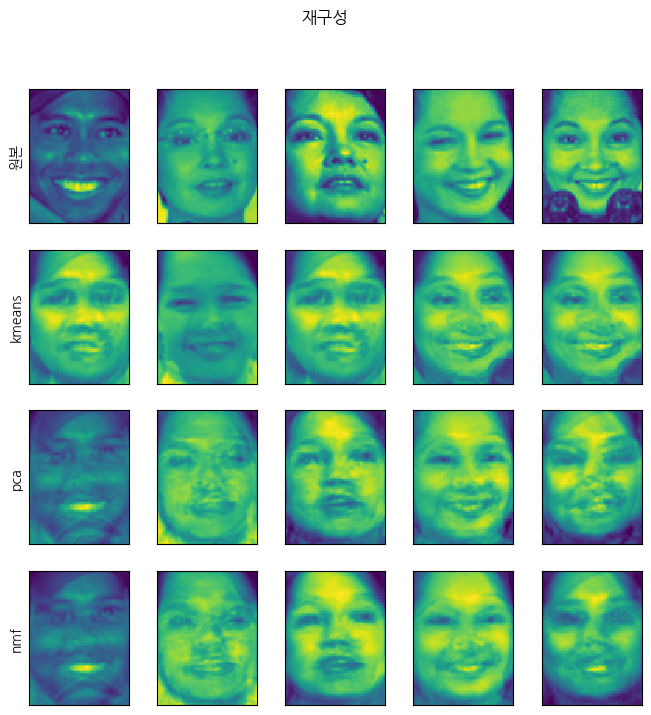

In [54]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_
):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap="viridis")
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={"xticks": (), "yticks": ()}, figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf
):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()  # 책에는 없음

클러스터 레이블:
 [8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


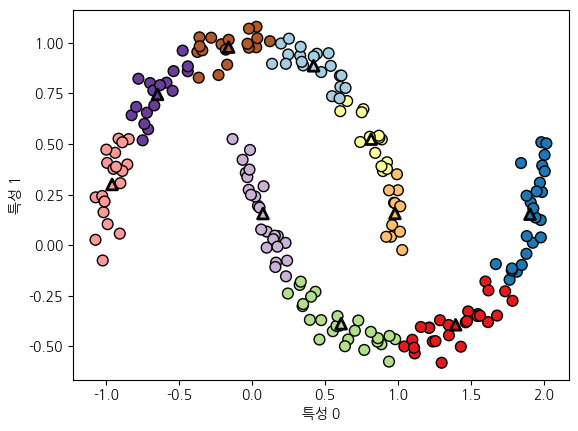

In [55]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap="Paired", edgecolors="black")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=60,
    marker="^",
    c=range(kmeans.n_clusters),
    linewidth=2,
    cmap="Paired",
    edgecolors="black",
)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [56]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.537 1.15  0.932 ... 1.48  0.003 1.077]
 [1.741 0.606 1.007 ... 2.529 1.208 2.237]
 [0.757 1.931 0.916 ... 0.783 0.876 0.718]
 ...
 [0.927 1.738 0.579 ... 1.115 0.834 1.041]
 [0.323 1.976 1.479 ... 0.814 0.846 0.284]
 [1.633 0.472 1.023 ... 2.466 1.098 2.148]]


#### 엘보우 방법

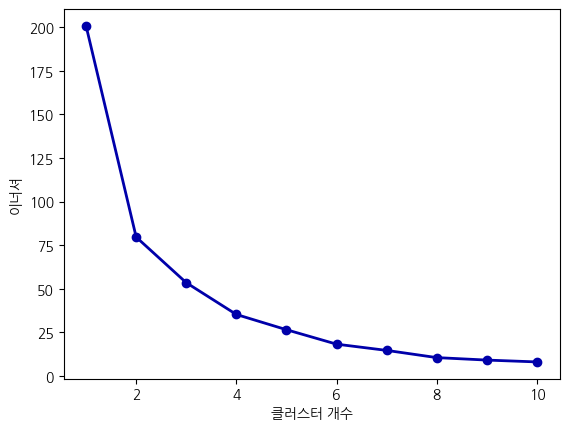

In [57]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("클러스터 개수")
plt.ylabel("이너셔")
plt.show()

## 병합 군집

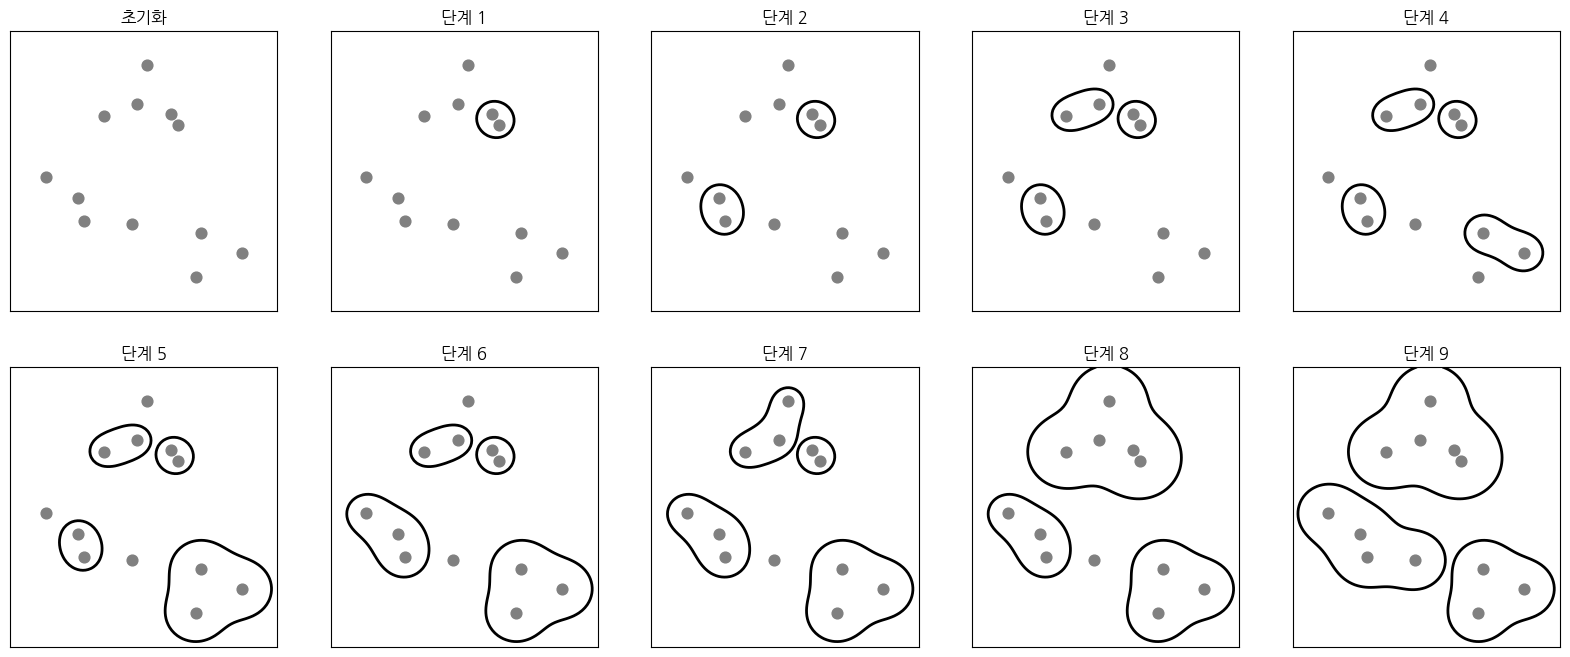

In [58]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, '특성 1')

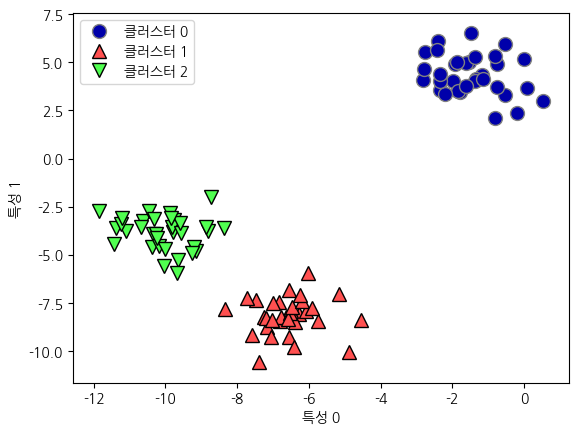

In [59]:
from sklearn.cluster import AgglomerativeClustering


X, y = make_blobs(random_state=1)


agg = AgglomerativeClustering(n_clusters=3)


assignment = agg.fit_predict(X)


mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)


plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")


plt.xlabel("특성 0")


plt.ylabel("특성 1")

#### 계층적 군집과 덴드로그램(dendrograms)

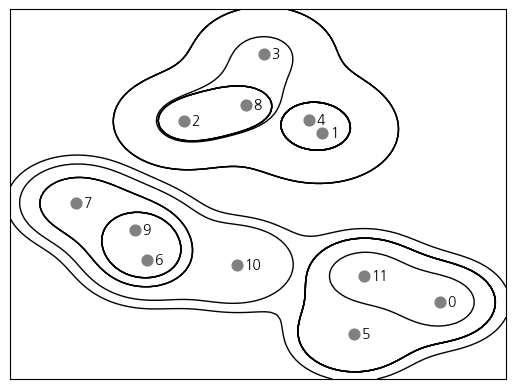

In [60]:
mglearn.plots.plot_agglomerative()

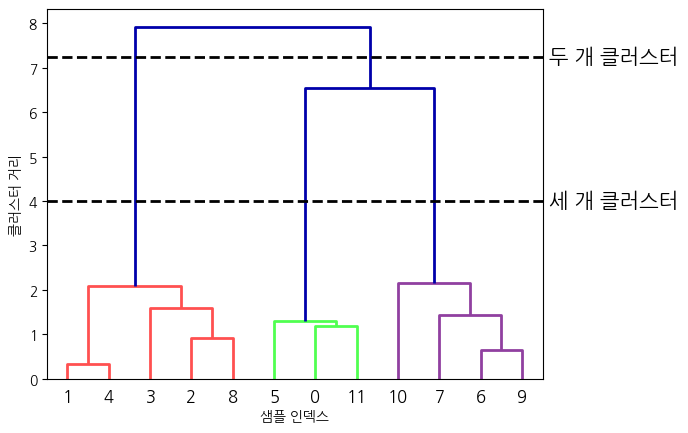

In [61]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c="k")
ax.plot(bounds, [4, 4], "--", c="k")

ax.text(bounds[1], 7.25, " 두 개 클러스터", va="center", fontdict={"size": 15})
ax.text(bounds[1], 4, " 세 개 클러스터", va="center", fontdict={"size": 15})
plt.xlabel("샘플 인덱스")
plt.ylabel("클러스터 거리")
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


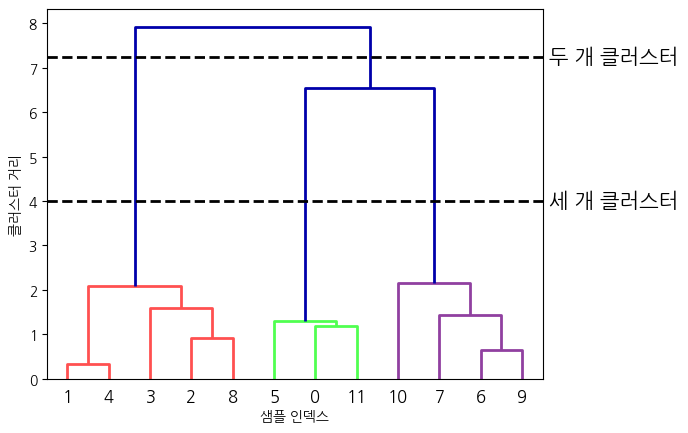

In [ ]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # 리프 노드
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage_matrix를 사용해 덴드로그램을 그립니다
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c="k")
ax.plot(bounds, [4, 4], "--", c="k")

ax.text(bounds[1], 7.25, " 두 개 클러스터", va="center", fontdict={"size": 15})
ax.text(bounds[1], 4, " 세 개 클러스터", va="center", fontdict={"size": 15})
plt.xlabel("샘플 인덱스")
plt.ylabel("클러스터 거리")
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN


X, y = make_blobs(random_state=0, n_samples=12)


dbscan = DBSCAN()


clusters = dbscan.fit_predict(X)


print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


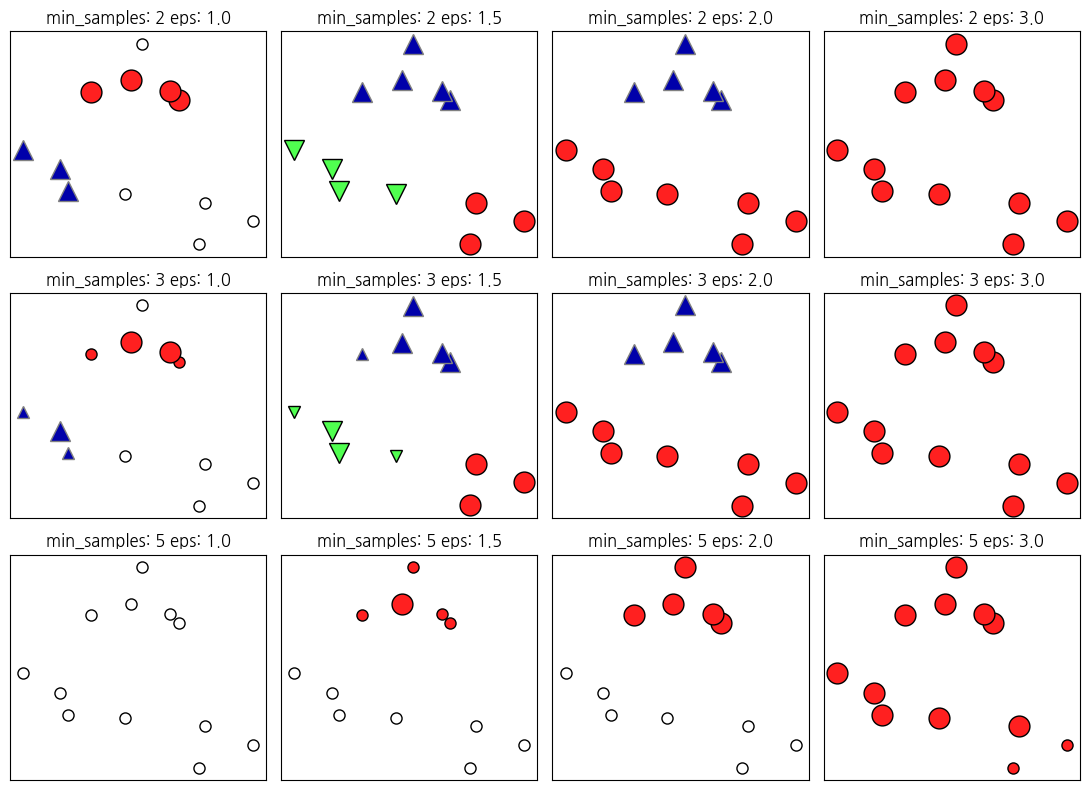

In [ ]:
mglearn.plots.plot_dbscan()

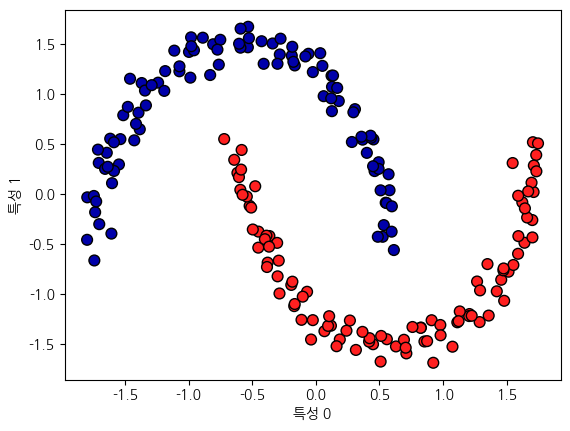

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=clusters,
    cmap=mglearn.cm2,
    s=60,
    edgecolors="black",
)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()  # 책에는 없음

## 군집 알고리즘의 비교와 평가
### 타겟값으로 군집 평가하기

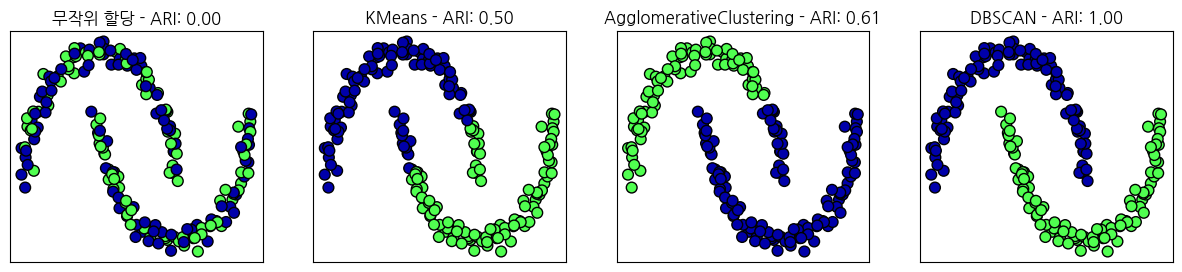

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다


scaler = StandardScaler()


scaler.fit(X)


X_scaled = scaler.transform(X)


fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})


# 사용할 알고리즘 모델을 리스트로 만듭니다


algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]


# 비교를 위해 무작위로 클러스터 할당을 합니다


random_state = np.random.RandomState(seed=0)


random_clusters = random_state.randint(low=0, high=2, size=len(X))


# 무작위 할당한 클러스터를 그립니다


axes[0].scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=random_clusters,
    cmap=mglearn.cm3,
    s=60,
    edgecolors="black",
)


axes[0].set_title(
    "무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters))
)


for ax, algorithm in zip(axes[1:], algorithms):

    # 클러스터 할당과 클러스터 중심을 그립니다

    clusters = algorithm.fit_predict(X_scaled)

    ax.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=clusters,
        cmap=mglearn.cm3,
        s=60,
        edgecolors="black",
    )

    ax.set_title(
        "{} - ARI: {:.2f}".format(
            algorithm.__class__.__name__, adjusted_rand_score(y, clusters)
        )
    )

In [ ]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


### 타겟값 없이 군집 평가하기

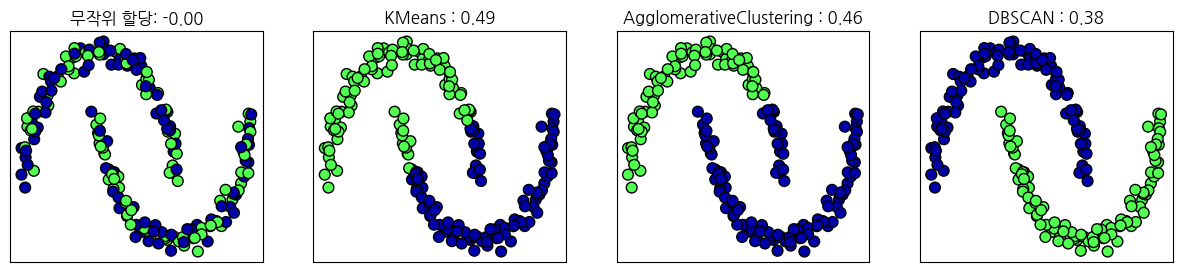

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=random_clusters,
    cmap=mglearn.cm3,
    s=60,
    edgecolors="black",
)
axes[0].set_title(
    "무작위 할당: {:.2f}".format(silhouette_score(X_scaled, random_clusters))
)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=clusters,
        cmap=mglearn.cm3,
        s=60,
        edgecolors="black",
    )
    ax.set_title(
        "{} : {:.2f}".format(
            algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)
        )
    )

## 얼굴 데이터셋으로 군집 알고리즘 비교

In [ ]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

NameError: name 'X_people' is not defined

#### DBSCAN으로 얼굴 데이터셋 분석

In [ ]:
# 기본 매개변수로 DBSCAN을 적용합니다
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

NameError: name 'X_pca' is not defined

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

NameError: name 'X_pca' is not defined

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

NameError: name 'X_pca' is not defined

In [ ]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수:", np.bincount(labels + 1))

NameError: name 'labels' is not defined

In [ ]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw={"xticks": (), "yticks": ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape))

NameError: name 'labels' is not defined

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps= 1


NameError: name 'X_pca' is not defined

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(
        1, 14, figsize=(14 * 1.5, 4), subplot_kw={"xticks": (), "yticks": ()}
    )
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j + i].imshow(np.array([[1] * 65] * 87), vmin=0, vmax=1)
        axes[j + i].axis("off")

NameError: name 'X_pca' is not defined

#### k-평균으로 얼굴 데이터셋 분석하기

In [ ]:
n_clusters = 10
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

NameError: name 'X_pca' is not defined

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

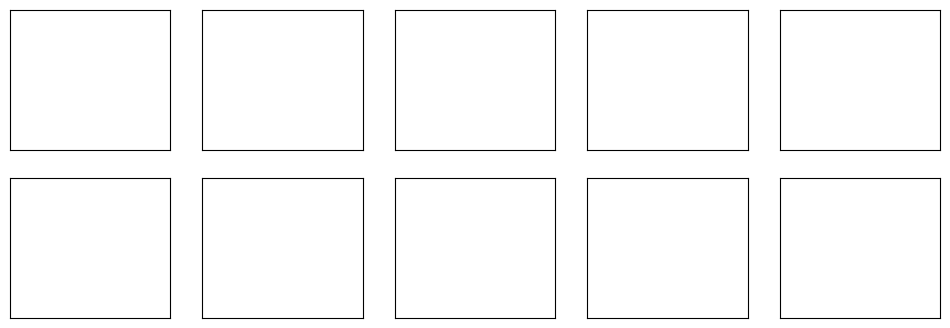

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={"xticks": (), "yticks": ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape))

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

NameError: name 'X_pca' is not defined

#### 병합 군집으로 얼굴 데이터셋 분석하기

In [ ]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

NameError: name 'X_pca' is not defined

In [ ]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

In [ ]:
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨있는 linkage_array로 덴드로그램을 그립니다
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode="level", no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], "--", c="k")

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(
        1, 10, subplot_kw={"xticks": (), "yticks": ()}, figsize=(15, 8)
    )
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(
        X_people[mask], y_people[mask], labels_agg[mask], axes
    ):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1], fontdict={"fontsize": 9})

In [ ]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:  # 흥미로운 클러스터 몇개를 골랐습니다
    mask = labels_agg == cluster
    fig, axes = plt.subplots(
        1, 15, subplot_kw={"xticks": (), "yticks": ()}, figsize=(15, 8)
    )
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(
        X_people[mask], y_people[mask], labels_agg[mask], axes
    ):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1], fontdict={"fontsize": 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

## 예제

> 주식을 비롯해서 자산가치를 형성하는 몇몇 방법이 있다. 이 때, 투자 안정성을 위해서 분산투자를 하려고 한다. 우리가 주식을 투자 방법으로 결정하고, 나머지 포트폴리오를 구성하는 방법을 결정하세요. 단, 수익율이 가장 높은 포트폴리오를 구성해주세요.

- https://github.com/FinanceData/FinanceDataReader

In [ ]:
import FinanceDataReader as fdr

### 데이터 수집

In [ ]:
ks11 = fdr.DataReader("KS11", "2016-01-01", "2023-12-31")
ixic = fdr.DataReader("IXIC", "2016-01-01", "2023-12-31")
n225 = fdr.DataReader("N225", "2016-01-01", "2023-12-31")
usd_krw = fdr.DataReader("USD/KRW", "2016-01-01", "2023-12-31")
btc_krw = fdr.DataReader("BTC/KRW", "2016-01-01", "2023-12-31")
us10yt = fdr.DataReader("US10YT", "2016-01-01", "2023-12-31")

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


In [ ]:
ks11.head()

,Open,High,Low,Close,...,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,
2016-01-04,1954.47,1954.52,1918.76,1918.76,...,2,-42.55,3966273691160,1215384387196179
2016-01-05,1911.93,1937.57,1911.93,1930.53,...,1,11.77,4197593667227,1222621740423229
2016-01-06,1934.25,1934.25,1911.61,1925.43,...,2,-5.10,6274716917514,1219296930268774
2016-01-07,1915.71,1926.41,1901.24,1904.33,...,2,-21.10,5003024735272,1205546061634302
2016-01-08,1889.42,1918.25,1883.82,1917.62,...,1,13.29,5205453870899,1213738732721558


In [ ]:
def my_fun(x):
    return x.iloc[1] - x.iloc[0]


ks11["Close"].rolling(window=2).apply(my_fun)

Date
2016-01-04      NaN
2016-01-05    11.77
2016-01-06    -5.10
2016-01-07   -21.10
2016-01-08    13.29
              ...  
2023-12-21   -14.28
2023-12-22    -0.51
2023-12-26     3.08
2023-12-27    10.91
2023-12-28    41.78
Name: Close, Length: 1966, dtype: float64

### 데이터 전처리

In [ ]:
kospi = fdr.DataReader("KS11", "2016-01-01", "2023-12-31")
kospi["Change"] = kospi["Change"] * 100
kospi = kospi.drop(
    ["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"],
    axis=1,
)
kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head()

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


,KOSPI
Date,
2016-01-04,-2.17
2016-01-05,0.61
2016-01-06,-0.26
2016-01-07,-1.10
2016-01-08,0.70


In [ ]:
nasdaq = fdr.DataReader("IXIC", "2016-01-01", "2023-12-31")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2016-01-04,NaN
2016-01-05,-0.24
2016-01-06,-1.14
2016-01-07,-3.03
2016-01-08,-0.98
...,...
2023-12-22,0.19
2023-12-26,0.54
2023-12-27,0.16


In [ ]:
usa_treasury = fdr.DataReader("US10YT", "2016-01-01", "2023-12-31")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_9352\187267961.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,0.13
2016-01-06,-3.16
2016-01-07,-1.10
...,...
2023-12-25,0.00
2023-12-26,-0.38
2023-12-27,-2.50


In [ ]:
japan = fdr.DataReader("N225", "2001-06-08", "2024-01-23")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_9352\3238539496.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-08,NaN
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
...,...
2024-01-16,-0.79
2024-01-17,-0.40
2024-01-18,-0.03


In [ ]:
usd_krw = fdr.DataReader("USD/KRW", "2016-01-01", "2023-12-31")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_9352\3698897066.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2016-01-01,NaN
2016-01-04,0.00
2016-01-05,1.13
2016-01-06,0.11
2016-01-07,0.84
...,...
2023-12-25,0.44
2023-12-26,-0.21
2023-12-27,-0.05


In [ ]:
btc_krw = fdr.DataReader("BTC/KRW", "2016-01-01", "2023-12-31")
btc_krw["Change"] = round(btc_krw["Adj Close"].pct_change() * 100, 2)
btc_krw = btc_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
btc_krw = btc_krw.rename(columns={"Change": "BTC/KRW"})
btc_krw

,BTC/KRW
Date,
2016-01-01,NaN
2016-01-02,-0.21
2016-01-03,-0.77
2016-01-04,1.88
2016-01-05,-0.14
...,...
2023-12-26,1.15
2023-12-27,-2.79
2023-12-28,2.43


### 데이터 병합

In [ ]:
result_data = pd.concat([kospi, nasdaq, usd_krw, usa_treasury, japan, btc_krw], axis=1)
result_data.fillna(result_data.mean(), inplace=True)
result_data = round(result_data, 2)

In [ ]:
result_data.to_csv("kospi_result_data.csv")

In [ ]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6586 entries, 2001-06-08 to 2024-01-22
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KOSPI         6586 non-null   float64
 1   NASDAQ        6586 non-null   float64
 2   USD/KRW       6586 non-null   float64
 3   USA_TREASURY  6586 non-null   float64
 4   Nikkei        6586 non-null   float64
 5   BTC/KRW       6586 non-null   float64
dtypes: float64(6)
memory usage: 360.2 KB


## 예제(KOSPI 연관 지수)
> KMean을 사용해서 KOSPI와 연관이 높은 지수를 분류

In [ ]:
result_data

,KOSPI,NASDAQ,USD/KRW,USA_TREASURY,Nikkei,BTC/KRW
Date,,,,,,
2001-06-08,0.02,0.07,0.01,0.08,0.03,0.23
2001-06-11,0.02,0.07,0.01,0.08,-1.52,0.23
2001-06-12,0.02,0.07,0.01,0.08,-2.92,0.23
2001-06-13,0.02,0.07,0.01,0.08,-0.13,0.23
2001-06-14,0.02,0.07,0.01,0.08,0.18,0.23
...,...,...,...,...,...,...
2024-01-16,0.02,0.07,0.01,0.08,-0.79,0.23
2024-01-17,0.02,0.07,0.01,0.08,-0.40,0.23
2024-01-18,0.02,0.07,0.01,0.08,-0.03,0.23


In [ ]:
X = result_data.drop("KOSPI", axis=1)
y = result_data["KOSPI"]

In [ ]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

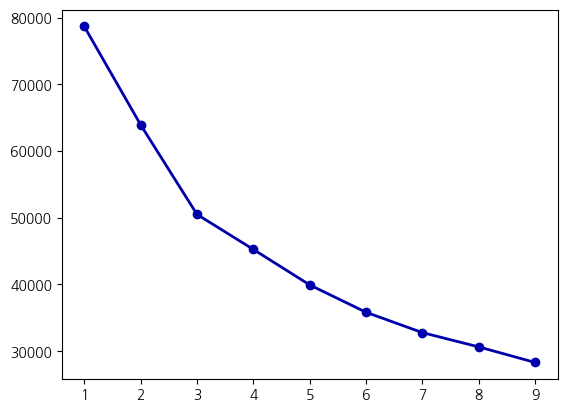

In [ ]:
plt.plot(ks,inertias,marker='o')

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 2])

In [ ]:
from sklearn.manifold import TSNE

n_sne = X.shape[0]
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=32,
            n_iter=1000,
            angle=0.5,
            random_state=42)
tsne_result = tsne.fit_transform(X)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 6586 samples in 0.007s...
[t-SNE] Computed neighbors for 6586 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6586
[t-SNE] Computed conditional probabilities for sample 2000 / 6586
[t-SNE] Computed conditional probabilities for sample 3000 / 6586
[t-SNE] Computed conditional probabilities for sample 4000 / 6586
[t-SNE] Computed conditional probabilities for sample 5000 / 6586
[t-SNE] Computed conditional probabilities for sample 6000 / 6586
[t-SNE] Computed conditional probabilities for sample 6586 / 6586
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.768028
[t-SNE] KL divergence after 1000 iterations: 0.489747


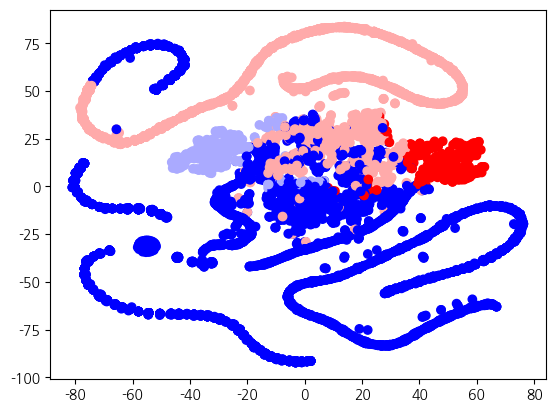

In [ ]:
plt.scatter(tsne_result[:,0], 
            tsne_result[:,1], 
            c=y_kmeans,
            cmap="bwr")

In [ ]:
df1 = result_data.copy()

In [ ]:
df1["cluster"] = y_kmeans
df1.head()

,KOSPI,NASDAQ,USD/KRW,USA_TREASURY,Nikkei,BTC/KRW,cluster
Date,,,,,,,
2001-06-08,0.02,0.07,0.01,0.08,0.03,0.23,0
2001-06-11,0.02,0.07,0.01,0.08,-1.52,0.23,0
2001-06-12,0.02,0.07,0.01,0.08,-2.92,0.23,0
2001-06-13,0.02,0.07,0.01,0.08,-0.13,0.23,0
2001-06-14,0.02,0.07,0.01,0.08,0.18,0.23,0


In [ ]:
cluster_0 = df1[df1["cluster"]==0]
cluster_1 = df1[df1["cluster"]==1]
cluster_2 = df1[df1["cluster"]==2]

In [ ]:
cluster_1

,KOSPI,NASDAQ,USD/KRW,USA_TREASURY,Nikkei,BTC/KRW,cluster
Date,,,,,,,
2016-01-15,-1.11,-2.74,-0.32,-3.10,-0.54,-14.88,1
2016-01-22,2.11,2.66,-0.43,1.44,5.88,-7.28,1
2016-01-28,0.48,0.86,0.83,-0.80,-0.71,-3.82,1
2016-02-23,-0.11,-1.47,-0.89,-1.19,-0.37,-3.17,1
2016-03-04,-0.13,0.20,-1.18,2.90,0.32,-3.57,1
...,...,...,...,...,...,...,...
2023-11-15,2.20,0.07,-1.12,2.12,2.52,-3.70,1
2023-11-17,-0.74,0.08,-0.72,-0.09,0.48,-5.29,1
2023-11-22,0.05,0.46,0.55,-0.05,0.29,-3.88,1


In [ ]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean()
cluster_total["std"] = cluster_total.T.std()
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2,3
KOSPI,-0.03,4.01e-02,1.47e-01,-0.13
NASDAQ,0.05,-3.51e-01,1.45e-01,0.27
USD/KRW,0.02,-5.85e-02,-6.42e-03,0.05
USA_TREASURY,-0.20,-2.09e-01,7.69e-01,-0.05
Nikkei,-0.53,6.53e-03,1.28e+00,-0.13
BTC/KRW,0.21,-5.99e+00,1.84e-01,6.26
return,-0.08,-1.09e+00,4.20e-01,1.04
std,0.24,2.19e+00,4.56e-01,2.34
